In [1]:
!pip install minio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.9 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minio import Minio
import io

In [10]:
client = Minio('minio1:9000',
                access_key='airflow',
                secret_key='sample_key',
                secure=False)

response = client.get_object('gold', 'exchanges_btcbrl.csv')
csv_data = response.read().decode('utf-8')
df = pd.read_csv(io.StringIO(csv_data))

In [11]:
df

,exchange_name,result.price.last,result.price.high,result.price.low,result.price.change.percentage,result.price.change.absolute,result.volume,result.volumeQuote,datetime
0,binance,146099.0000,147410.0000,145734.0000,-0.000807,-118.0000,41.687260,6.110381e+06,2023-07-17 02:38:22.260000+00:00
1,bisq,150042.7127,152040.8612,146405.5243,-0.003530,-531.5057,0.174500,2.607401e+04,2023-07-17 02:38:21.743000+00:00
2,hitbtc,146090.0000,147441.0000,145751.0000,-0.000629,-92.0000,2.029309,2.973884e+05,2023-07-17 02:38:22.442000+00:00
3,huobi,142000.0000,142000.0000,142000.0000,0.000000,0.0000,0.000580,8.236000e+01,2023-07-17 02:38:22.624000+00:00
4,kucoin,146889.0000,147489.3000,145785.7000,0.001625,238.3000,0.154620,2.270086e+04,2023-07-17 02:38:22.792000+00:00


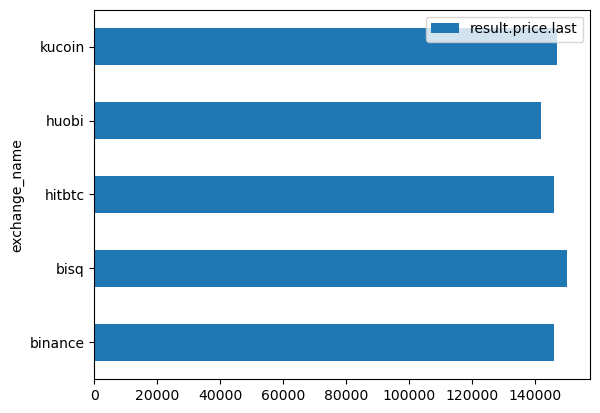

In [13]:
result = df.groupby('exchange_name').last()
result.plot(kind='barh', y='result.price.last')
plt.show()